# Cleaning and seperating categorical and numerical columns

In [104]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#loading train and test data
Bank_data_train= pd.read_csv('/content/train_s3TEQDk (1).csv')
Bank_data_test= pd.read_csv('/content/test_mSzZ8RL (1).csv')

#checking for null values
Bank_data_train.isnull().sum()
Bank_data_test.isnull().sum()

#droping ID from both train and test
Bank_data_train=Bank_data_train.drop(['ID'],axis=1)
ID=Bank_data_test['ID']
Bank_data_test=Bank_data_test.drop(['ID'],axis=1)

#Imputing with new class 
Bank_data_train['Credit_Product']= Bank_data_train['Credit_Product'].fillna('no_card')
Bank_data_test['Credit_Product']= Bank_data_test['Credit_Product'].fillna('no_card')


#re-checking for null values
Bank_data_train.isnull().sum()
Bank_data_test.isnull().sum()


#seperating categorical columns in both train and test
catcols_train=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']

catcols_test=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

numcols_train=[]
for col in Bank_data_train.columns:
      if col not in catcols_train:
          numcols_train.append(col)
          
numcols_test=[]
for col in Bank_data_test.columns:
      if col not in catcols_test:
          numcols_test.append(col)

#train data with seperated numerical and categorical columns          
Bank_num_train=Bank_data_train[numcols_train]
Bank_cat_train=Bank_data_train[catcols_train]

#test data with seperated numerical and categorical columns   
Bank_num_test=Bank_data_test[numcols_test]
Bank_cat_test=Bank_data_test[catcols_test]

In [59]:
#checking for unique columns
for col in Bank_data_train.columns:
  if col=='Region_Code':
    print('Unique element in {}'.format(col))
    print(Bank_data_train[col].unique())

#checking for unique columns
for col in Bank_data_test.columns:
  if col=='Region_Code':
    print('Unique element in {}'.format(col))
    print(Bank_data_test[col].unique())

Unique element in Region_Code
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Unique element in Region_Code
['RG254' 'RG268' 'RG270' 'RG272' 'RG253' 'RG257' 'RG284' 'RG283' 'RG277'
 'RG273' 'RG261' 'RG280' 'RG274' 'RG278' 'RG269' 'RG281' 'RG251' 'RG252'
 'RG279' 'RG282' 'RG262' 'RG263' 'RG264' 'RG256' 'RG265' 'RG260' 'RG258'
 'RG271' 'RG250' 'RG275' 'RG276' 'RG267' 'RG255' 'RG259' 'RG266']


# EDA FOR NUMERICAL DATA

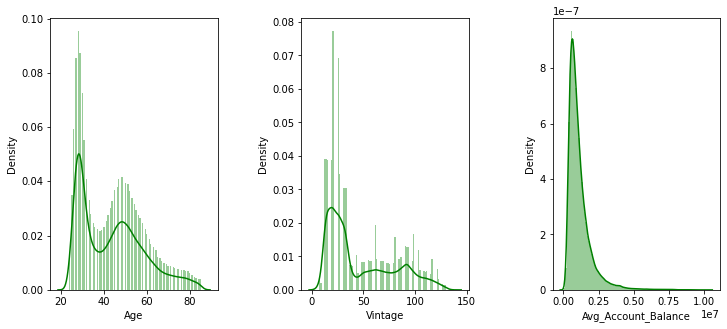

In [60]:
fig,ax=plt.subplots(1,3,figsize=(12,5))
for i,ax in enumerate(fig.axes):
    if i < len(Bank_num_train.columns):
        sns.distplot(Bank_num_train.iloc[:,i],color='g', bins=100,kde_kws={'bw':0.1},ax=ax)
        plt.subplots_adjust(wspace=.5, hspace=.5)
#comments 
        # In all variables zeros are more as a result distribution is not clear
        # we try removing those zeros for plotting purpose

Possible to transform columns to make it normal

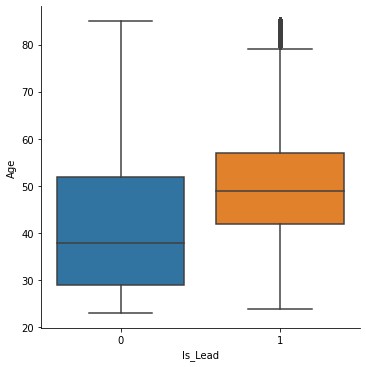

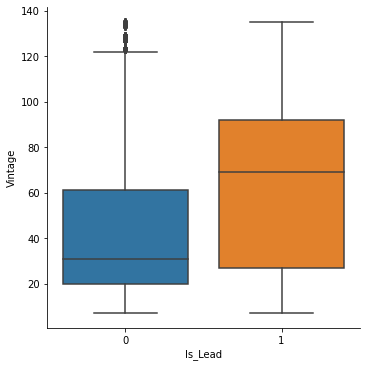

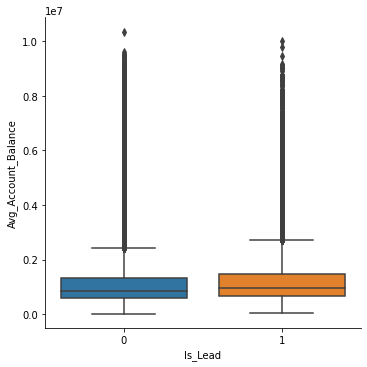

In [61]:
Bank_num_plot=Bank_num_train.copy()
Bank_num_plot=Bank_num_plot.join(Bank_cat_train['Is_Lead'])
################  numerical vs Target ########       
for i in range(0,3):
 sns.catplot(x='Is_Lead',y=Bank_num_plot.columns[i],kind='box',data=Bank_num_plot)

#Avg_Account_Balance has more outliers

In [105]:
Bank_num_trans_train=Bank_num_train.copy()
Bank_num_trans_test=Bank_num_test.copy()

In [106]:
Bank_num_trans_train['Avg_Account_Balance']=np.log(Bank_num_trans_train['Avg_Account_Balance'])
Bank_num_trans_test['Avg_Account_Balance']=np.log(Bank_num_trans_test['Avg_Account_Balance'])

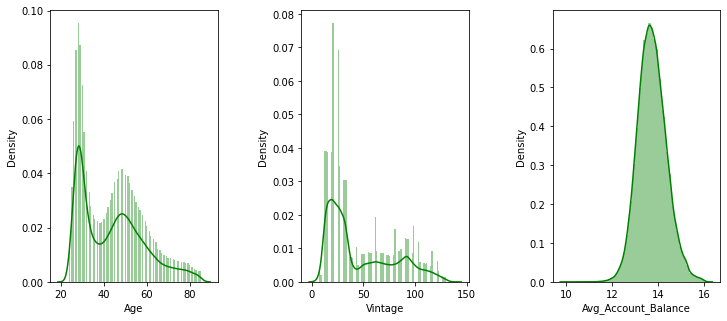

In [64]:
fig,ax=plt.subplots(1,3,figsize=(12,5))
for i,ax in enumerate(fig.axes):
    if i < len(Bank_num_trans_train.columns):
        sns.distplot(Bank_num_trans_train.iloc[:,i],color='g', bins=100,kde_kws={'bw':0.1},ax=ax)
        plt.subplots_adjust(wspace=.5, hspace=.5)

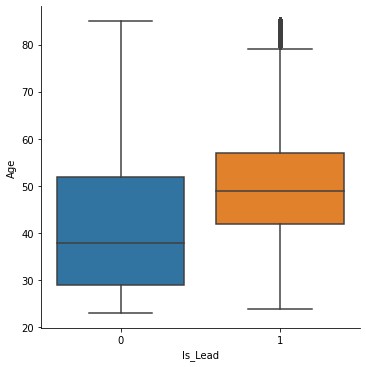

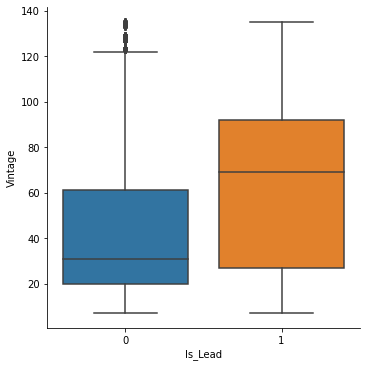

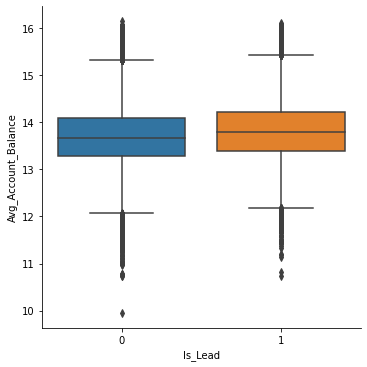

In [65]:
Bank_num_plot=Bank_num_trans_train.copy()
Bank_num_plot=Bank_num_plot.join(Bank_cat_train['Is_Lead'])
################  numerical vs Target ########       
for i in range(0,3):
 sns.catplot(x='Is_Lead',y=Bank_num_plot.columns[i],kind='box',data=Bank_num_plot)

#Avg_Account_Balance has more outliers

In [107]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [108]:
Bank_num_trans_re=remove_outliers_using_quantiles(Bank_num_trans_train,'Avg_Account_Balance','outer')

interquartile range: 0.8160421649165492
upper_inner_fence: 15.351948002576254
lower_inner_fence: 12.087779342910057
upper_outer_fence: 16.57601124995108
lower_outer_fence: 10.863716095535233
percentage of records out of inner fences: 1.22
percentage of records out of outer fences: 0.00
length of input dataframe: 245725
length of new dataframe after outlier removal: 245717


In [109]:
Bank_num_trans_re=remove_outliers_using_quantiles(Bank_num_trans_re,'Age','outer')

interquartile range: 24.0
upper_inner_fence: 90.0
lower_inner_fence: -6.0
upper_outer_fence: 126.0
lower_outer_fence: -42.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00
length of input dataframe: 245717
length of new dataframe after outlier removal: 245717


In [110]:
Bank_num_trans_re=remove_outliers_using_quantiles(Bank_num_trans_re,'Vintage','outer')

interquartile range: 53.0
upper_inner_fence: 152.5
lower_inner_fence: -59.5
upper_outer_fence: 232.0
lower_outer_fence: -139.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00
length of input dataframe: 245717
length of new dataframe after outlier removal: 245717


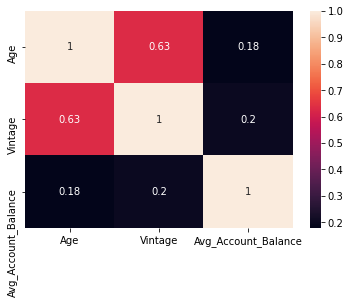

In [19]:
cor=Bank_num_trans_re.corr()
sns.heatmap(cor, annot=True)
#Here Vintage and Age are correlated

# EDA FOR CATEGORICAL COLUMNS

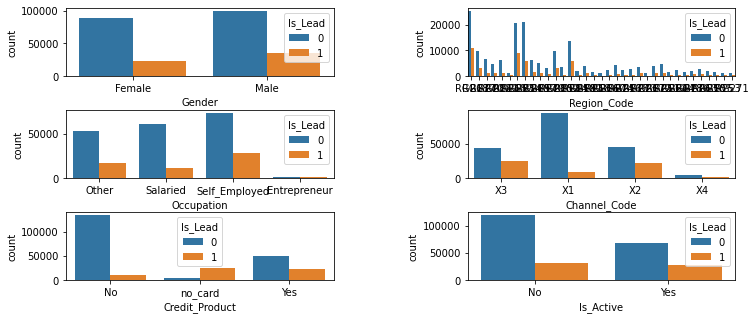

In [20]:
fig,ax=plt.subplots(3,2,figsize=(12,5))
for i,ax in enumerate(fig.axes):
    if i <= len(Bank_cat_train.columns):
        if Bank_cat_train.columns[i]!='Is_Lead':
         sns.countplot(x=Bank_cat_train.iloc[:,i],hue=Bank_cat_train['Is_Lead'],ax=ax)
         plt.subplots_adjust(wspace=.5, hspace=.5)

# 1. In Occupation column 'Entrepreneur' is of less frequency when compared to others 
# 2. In Channel_code column 'X4' is of less frequency when compared to others
# 3.  Region_code  column has many number of classes

# First Model with all columns and label enconding of categorical columns

 **Label encoding**






In [111]:
#copying Categorical data 
Bank_cat_en_train=Bank_cat_train.copy()
Bank_cat_en_test=Bank_cat_test.copy()

from sklearn.preprocessing import LabelEncoder
for col in Bank_cat_en_train.columns:
 if col!='Is_Lead':
  labelen=LabelEncoder()    
  labelen.fit(Bank_cat_en_train[col])
  Bank_cat_en_train[col]=labelen.transform(Bank_cat_en_train[col])
  Bank_cat_en_test[col]=labelen.transform(Bank_cat_en_test[col])

In [112]:
Bank_cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          245725 non-null  object
 1   Region_Code     245725 non-null  object
 2   Occupation      245725 non-null  object
 3   Channel_Code    245725 non-null  object
 4   Credit_Product  245725 non-null  object
 5   Is_Active       245725 non-null  object
 6   Is_Lead         245725 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 13.1+ MB


In [113]:
Bank_final_train1=pd.concat([Bank_num_trans_re,Bank_cat_en_train],axis=1)

In [114]:
Bank_final_test1=pd.concat([Bank_num_trans_test,Bank_cat_en_test],axis=1)

In [115]:
Bank_final_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  245717 non-null  float64
 1   Vintage              245717 non-null  float64
 2   Avg_Account_Balance  245717 non-null  float64
 3   Gender               245725 non-null  int64  
 4   Region_Code          245725 non-null  int64  
 5   Occupation           245725 non-null  int64  
 6   Channel_Code         245725 non-null  int64  
 7   Credit_Product       245725 non-null  int64  
 8   Is_Active            245725 non-null  int64  
 9   Is_Lead              245725 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 20.6 MB


# First catboost-1

In [116]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(Bank_final_train1.iloc[:,0:9],Bank_final_train1.iloc[:,9],test_size=0.25,stratify=Bank_final_train1.iloc[:,9],random_state=100)

In [117]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(n_estimators=2000,eval_metric='AUC')
clf.fit(X_train1, y_train1,eval_set=[(X_train1, y_train1), (X_test1, y_test1)],early_stopping_rounds=30,verbose=100)

Learning rate set to 0.085024
0:	test: 0.8604740	test1: 0.8605903	best: 0.8605903 (0)	total: 115ms	remaining: 3m 49s
100:	test: 0.8753362	test1: 0.8739005	best: 0.8739050 (98)	total: 9.54s	remaining: 2m 59s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8741299842
bestIteration = 168

Shrink model to first 169 iterations.


In [28]:
y_pred_test1=clf.predict_proba(Bank_final_test1)[:, 1]
y_pred_test1

array([0.06586148, 0.863915  , 0.05467182, ..., 0.09069191, 0.23736768,
       0.0500021 ])

In [29]:
clf.feature_importances_

array([11.80432409, 11.07032527,  0.76939641,  0.39116286,  0.80632005,
       33.12242539,  3.12774523, 36.78511961,  2.12318107])

In [30]:
pred_df1 = pd.DataFrame(y_pred_test1)
pred_df1.insert(0, "ID",ID, True)
sub1=pred_df1.rename(columns={'0': 'Is_Lead'})
sub1.to_csv("catboost-all.csv",index=False)

# SECOND catboost

In [118]:
# feature selection for categorical input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(Bank_final_train1.iloc[:,3:9], Bank_final_train1['Is_Lead'])
X_train_fs = fs.transform(Bank_final_train1.iloc[:,3:9])
for i in range(len(fs.scores_)):
    print(' %s: %f' % (Bank_final_train1.iloc[:,3:9].columns[i],fs.scores_[i]))

 Gender: 579.252616
 Region_Code: 5703.671209
 Occupation: 13.125378
 Channel_Code: 14539.106549
 Credit_Product: 73316.695599
 Is_Active: 1104.406107


In [119]:
Bank_final_train2=Bank_final_train1.drop(['Occupation'],axis=1)
Bank_final_test2=Bank_final_test1.drop(['Occupation'],axis=1)

In [120]:
Bank_final_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  245717 non-null  float64
 1   Vintage              245717 non-null  float64
 2   Avg_Account_Balance  245717 non-null  float64
 3   Gender               245725 non-null  int64  
 4   Region_Code          245725 non-null  int64  
 5   Channel_Code         245725 non-null  int64  
 6   Credit_Product       245725 non-null  int64  
 7   Is_Active            245725 non-null  int64  
 8   Is_Lead              245725 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 18.7 MB


In [121]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(Bank_final_train2.iloc[:,0:8],Bank_final_train2.iloc[:,8],test_size=0.25,stratify=Bank_final_train2.iloc[:,8],random_state=100)

In [122]:
from catboost import CatBoostClassifier
clf2 = CatBoostClassifier(n_estimators=2000,eval_metric='AUC')
clf2.fit(X_train2, y_train2, eval_set=[(X_train2, y_train2), (X_test2, y_test2)],early_stopping_rounds=30,verbose=100)

Learning rate set to 0.085024
0:	test: 0.8554796	test1: 0.8557433	best: 0.8557433 (0)	total: 86ms	remaining: 2m 52s
100:	test: 0.8666059	test1: 0.8649298	best: 0.8649365 (97)	total: 9.5s	remaining: 2m 58s
200:	test: 0.8690544	test1: 0.8650379	best: 0.8651215 (173)	total: 19s	remaining: 2m 50s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8651215134
bestIteration = 173

Shrink model to first 174 iterations.


In [123]:
y_pred_test2=clf2.predict_proba(Bank_final_test2)[:, 1]
pred_df2 = pd.DataFrame(y_pred_test2)
pred_df2.insert(0, "ID",ID, True)
pred_df2.to_csv("catboost-2.csv",index=False)

# Catboost with categorical feature selection

In [82]:
collist=list(Bank_cat_en_train.iloc[:,0:6].columns)
Bank_cat_dummies_train=pd.get_dummies(Bank_cat_en_train.iloc[:,0:6],columns=collist)

In [83]:
collist=list(Bank_cat_en_test.iloc[:,0:6].columns)
Bank_cat_dummies_test=pd.get_dummies(Bank_cat_en_test.iloc[:,0:6],columns=collist)

In [84]:
Bank_cat_dummies_train['Is_Lead']=Bank_cat_en_train['Is_Lead']

In [85]:
Bank_cat_dummies_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 51 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Gender_0          245725 non-null  uint8
 1   Gender_1          245725 non-null  uint8
 2   Region_Code_0     245725 non-null  uint8
 3   Region_Code_1     245725 non-null  uint8
 4   Region_Code_2     245725 non-null  uint8
 5   Region_Code_3     245725 non-null  uint8
 6   Region_Code_4     245725 non-null  uint8
 7   Region_Code_5     245725 non-null  uint8
 8   Region_Code_6     245725 non-null  uint8
 9   Region_Code_7     245725 non-null  uint8
 10  Region_Code_8     245725 non-null  uint8
 11  Region_Code_9     245725 non-null  uint8
 12  Region_Code_10    245725 non-null  uint8
 13  Region_Code_11    245725 non-null  uint8
 14  Region_Code_12    245725 non-null  uint8
 15  Region_Code_13    245725 non-null  uint8
 16  Region_Code_14    245725 non-null  uint8
 17  Region_Cod

In [86]:
# feature selection for categorical input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(Bank_cat_dummies_train.iloc[:,0:49], Bank_cat_en_train['Is_Lead'])
X_train_fs = fs.transform(Bank_cat_dummies_train.iloc[:,0:49])
for i in range(len(fs.scores_)):
    print(' %s: %f' % (Bank_cat_dummies_train.iloc[:,0:49].columns[i],fs.scores_[i]))

 Gender_0: 696.990561
 Gender_1: 579.252616
 Region_Code_0: 87.748399
 Region_Code_1: 0.857797
 Region_Code_2: 232.554438
 Region_Code_3: 4.823010
 Region_Code_4: 87.982936
 Region_Code_5: 0.256955
 Region_Code_6: 146.093007
 Region_Code_7: 69.610292
 Region_Code_8: 3.046335
 Region_Code_9: 27.010163
 Region_Code_10: 36.704921
 Region_Code_11: 202.320914
 Region_Code_12: 31.611326
 Region_Code_13: 4.799790
 Region_Code_14: 154.606361
 Region_Code_15: 3.958382
 Region_Code_16: 83.401037
 Region_Code_17: 64.424801
 Region_Code_18: 778.034234
 Region_Code_19: 10.490467
 Region_Code_20: 368.286102
 Region_Code_21: 39.345614
 Region_Code_22: 8.679233
 Region_Code_23: 0.006358
 Region_Code_24: 152.474565
 Region_Code_25: 87.560632
 Region_Code_26: 25.241871
 Region_Code_27: 1.959386
 Region_Code_28: 3.143771
 Region_Code_29: 2.959197
 Region_Code_30: 0.196929
 Region_Code_31: 9.609156
 Region_Code_32: 65.425517
 Region_Code_33: 683.455614
 Region_Code_34: 434.990044
 Occupation_0: 2643.07981

In [87]:
df = pd.DataFrame(columns = ['cat_columnname','chi2_score'])
for i in range(len(fs.scores_)):
    df.loc[len(df.index)] = [Bank_cat_dummies_train.iloc[:,0:49].columns[i],fs.scores_[i]]

In [88]:
df.sort_values(by=['chi2_score'], inplace=True, ascending=False)
df

,cat_columnname,chi2_score
47,Credit_Product_2,61190.102852
45,Credit_Product_0,21358.665853
41,Channel_Code_0,12183.096547
43,Channel_Code_2,6399.647674
42,Channel_Code_1,3078.256689
37,Occupation_0,2643.079817
46,Credit_Product_1,2406.430706
39,Occupation_2,2392.408231
40,Occupation_3,837.507017
20,Region_Code_18,778.034234


In [130]:
#selecting columns with ch2 values greater than 500
selected_categorical=[]
for i in range(0,len(df.index)):
     if df.iloc[i,1] >100: 
        selected_categorical.append(df.iloc[i,0])
selected_categorical

['Credit_Product_2',
 'Credit_Product_0',
 'Channel_Code_0',
 'Channel_Code_2',
 'Channel_Code_1',
 'Occupation_0',
 'Credit_Product_1',
 'Occupation_2',
 'Occupation_3',
 'Region_Code_18',
 'Is_Active_0',
 'Gender_0',
 'Region_Code_33',
 'Gender_1',
 'Region_Code_34',
 'Region_Code_20',
 'Region_Code_2',
 'Region_Code_11',
 'Region_Code_14',
 'Region_Code_24',
 'Region_Code_6']

In [131]:
selected_categorical.append('Is_Lead')
Bank_cat_dummies_train_sel=Bank_cat_dummies_train[selected_categorical]
selected_categorical.remove('Is_Lead')
Bank_cat_dummies_test_sel=Bank_cat_dummies_test[selected_categorical]

In [132]:
Bank_final_train3=pd.concat([Bank_num_trans_train_re,Bank_cat_dummies_train_sel],axis=1)
Bank_final_test3=pd.concat([Bank_num_trans_test,Bank_cat_dummies_test_sel],axis=1)

In [133]:
Bank_final_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  242728 non-null  float64
 1   Vintage              242728 non-null  float64
 2   Avg_Account_Balance  242728 non-null  float64
 3   Credit_Product_2     245725 non-null  uint8  
 4   Credit_Product_0     245725 non-null  uint8  
 5   Channel_Code_0       245725 non-null  uint8  
 6   Channel_Code_2       245725 non-null  uint8  
 7   Channel_Code_1       245725 non-null  uint8  
 8   Occupation_0         245725 non-null  uint8  
 9   Credit_Product_1     245725 non-null  uint8  
 10  Occupation_2         245725 non-null  uint8  
 11  Occupation_3         245725 non-null  uint8  
 12  Region_Code_18       245725 non-null  uint8  
 13  Is_Active_0          245725 non-null  uint8  
 14  Gender_0             245725 non-null  uint8  
 15  Region_Code_33   

In [134]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(Bank_final_train3.iloc[:,0:24],Bank_final_train3.iloc[:,24],test_size=0.25,stratify=Bank_final_train3.iloc[:,24],random_state=100)

In [135]:
from catboost import CatBoostClassifier
clf3 = CatBoostClassifier(n_estimators=2000,eval_metric='AUC')
clf3.fit(X_train3, y_train3,eval_set=[(X_train3, y_train3), (X_test3, y_test3)],verbose=100,early_stopping_rounds=30)

Learning rate set to 0.085024
0:	test: 0.8634160	test1: 0.8645696	best: 0.8645696 (0)	total: 92.2ms	remaining: 3m 4s
100:	test: 0.8753369	test1: 0.8735273	best: 0.8735273 (100)	total: 9.57s	remaining: 2m 59s
200:	test: 0.8778830	test1: 0.8740071	best: 0.8740071 (200)	total: 19s	remaining: 2m 50s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8740705812
bestIteration = 231

Shrink model to first 232 iterations.


In [50]:
y_pred_test3=clf3.predict_proba(Bank_final_test3)[:, 1]
pred_df3 = pd.DataFrame(y_pred_test3)
pred_df3.insert(0, "ID",ID, True)
pred_df3.to_csv("catboost-3.csv",index=False)

#Fourth model

In [53]:
Bank_cat_en_train.iloc[:,0:6].columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

In [96]:
collist=list(Bank_cat_en_train.iloc[:,0:6].columns)
Bank_cat_dummies_train=pd.get_dummies(Bank_cat_en_train.iloc[:,0:6],columns=collist)

In [97]:
collist=list(Bank_cat_en_test.iloc[:,0:6].columns)
Bank_cat_dummies_test=pd.get_dummies(Bank_cat_en_test.iloc[:,0:6],columns=collist)

In [98]:
Bank_cat_dummies_train['Is_Lead']=Bank_cat_en_train['Is_Lead']

In [99]:
Bank_final_train4=pd.concat([Bank_num_trans_re,Bank_cat_dummies_train],axis=1)
Bank_final_test4=pd.concat([Bank_num_trans_test,Bank_cat_dummies_test],axis=1)

In [100]:
Bank_final_train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 54 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  245717 non-null  float64
 1   Vintage              245717 non-null  float64
 2   Avg_Account_Balance  245717 non-null  float64
 3   Gender_0             245725 non-null  uint8  
 4   Gender_1             245725 non-null  uint8  
 5   Region_Code_0        245725 non-null  uint8  
 6   Region_Code_1        245725 non-null  uint8  
 7   Region_Code_2        245725 non-null  uint8  
 8   Region_Code_3        245725 non-null  uint8  
 9   Region_Code_4        245725 non-null  uint8  
 10  Region_Code_5        245725 non-null  uint8  
 11  Region_Code_6        245725 non-null  uint8  
 12  Region_Code_7        245725 non-null  uint8  
 13  Region_Code_8        245725 non-null  uint8  
 14  Region_Code_9        245725 non-null  uint8  
 15  Region_Code_10   

In [101]:
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4=train_test_split(Bank_final_train4.iloc[:,0:53],Bank_final_train4.iloc[:,53],test_size=0.25,stratify=Bank_final_train4.iloc[:,53],random_state=100)

In [102]:
from catboost import CatBoostClassifier
clf5 = CatBoostClassifier(n_estimators=2000,eval_metric='AUC')
clf5.fit(X_train4, y_train4,eval_set=[(X_train4, y_train4), (X_test4, y_test4)],verbose=100,early_stopping_rounds=30)

Learning rate set to 0.085024
0:	test: 0.8616084	test1: 0.8629731	best: 0.8629731 (0)	total: 90.4ms	remaining: 3m
100:	test: 0.8756545	test1: 0.8740047	best: 0.8740190 (97)	total: 9.66s	remaining: 3m 1s
200:	test: 0.8783359	test1: 0.8745532	best: 0.8746075 (184)	total: 19.2s	remaining: 2m 52s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8746657618
bestIteration = 247

Shrink model to first 248 iterations.


In [103]:
y_pred_test4=clf5.predict_proba(Bank_final_test4)[:, 1]
pred_df4 = pd.DataFrame(y_pred_test4)
pred_df4.insert(0, "ID",ID, True)
pred_df4.to_csv("catboost-4.csv",index=False)